In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime

In [2]:
us = []
with open('us.csv', newline='') as csvfile:
    usreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(usreader, None)  
    for row in usreader:
        us.append(row)
states = []
with open('us-states.csv', newline='') as csvfile:
    statesreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(statesreader, None)  
    for row in statesreader:
        states.append(row)
counties = []
with open('us-counties.csv', newline='') as csvfile:
    countiesreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(countiesreader, None)  
    for row in countiesreader:
        counties.append(row)

In [3]:
usdates = []
uscases = []
usdeaths = []
for row in us:
    usdates.append(row[0])
    uscases.append(row[1])
    usdeaths.append(row[2])
statedict = {}
count=0
for row in states:
    state = row[1]
    date = datetime.datetime.strptime(row[0],'%Y-%m-%d')
    cases = int(row[3])
    deaths = int(row[4])
    if statedict.get(state)==None:
        statedict.update({state : {'dates':[date],'cases':[cases],'deaths':[deaths] } } )
    else:
        statedict.get(state).get('dates').append(date)     #Dates
        statedict.get(state).get('cases').append(cases)    #cases
        statedict.get(state).get('deaths').append(deaths)  #deaths
countydict = {}
for row in counties:
    county = row[1]
    state = row[2]
    date = datetime.datetime.strptime(row[0],'%Y-%m-%d')
    cases = int(row[4])
    deaths = int(row[5])
    if countydict.get(state)==None: #if state name is not in dictionary
        countydict.update({state: {county: {'dates':[date],'cases':[cases],'deaths':[deaths]}}})
    elif countydict.get(state).get(county)==None: #if county name is not in dictionary
        countydict.get(state).update({county: {'dates':[date],'cases':[cases],'deaths':[deaths]}})
    else:
        countydict.get(state).get(county).get('dates').append(date)
        countydict.get(state).get(county).get('cases').append(cases)
        countydict.get(state).get(county).get('deaths').append(deaths)

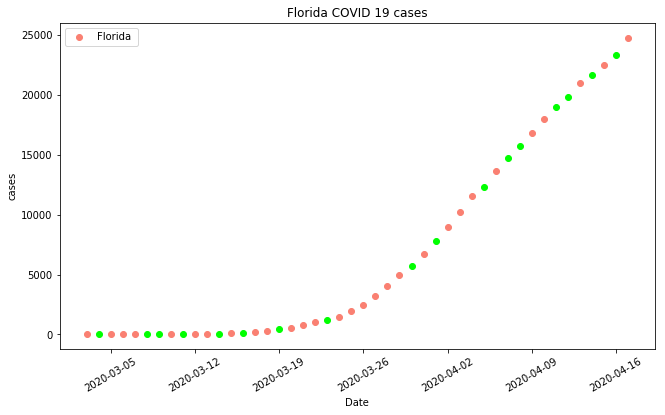

In [23]:
# statedict = {'State Name': {'Date':[datearray],'cases':[casearray],'deaths':[deatharray] } }
    # statedict contains one nested dictionary for given statename
# countydict = {'State Name': {'County Name': {'Date':[datearray],'cases':[casearray],'deaths':[deatharray] } }
    # countydict contains one nested dictionary for given statename, then one nested dictionary for given countyname

    
    
    
    

#################################################EDIT HERE############################################################
statename = 'Florida'
countyname = ''
casesordeaths = 'cases'
logscale = False
lastXdays = 0








#########################DO NOT EDIT UNLESS YOU ARE FAMILIAR WITH PYTHON##############################################
plt.figure(figsize=(10.67,6))
if countyname == '':
    plt.title(statename+' COVID 19 '+casesordeaths)
    dates = statedict.get(statename).get('dates')
    CorD = statedict.get(statename).get(casesordeaths)
    dotcasesordeaths = [ CorD[i+1]-CorD[i] for i in np.arange(len(CorD)-1)]
    ddotcasesordeaths = [ dotcasesordeaths[i+1]-dotcasesordeaths[i] for i in np.arange(len(dotcasesordeaths)-1)]
else:
    plt.title(statename+' '+countyname+' County COVID 19 '+casesordeaths)
    dates = countydict.get(statename).get(countyname).get('dates')
    CorD = countydict.get(statename).get(countyname).get(casesordeaths)
    dotcasesordeaths = [ CorD[i+1]-CorD[i] for i in np.arange(len(CorD)-1)]
    ddotcasesordeaths = [ dotcasesordeaths[i+1]-dotcasesordeaths[i] for i in np.arange(len(dotcasesordeaths)-1)]

if lastXdays>0:
    thirtyindex = len(ddotcasesordeaths)-lastXdays
else:
    thirtyindex = 0
    
for i in np.arange(len(ddotcasesordeaths)-thirtyindex):
    if ddotcasesordeaths[i+thirtyindex]>0:
        col = 'salmon'
    else:
        col = 'lime'
    if logscale:
        plt.semilogy(dates[i+2+thirtyindex],CorD[i+2+thirtyindex],'o',color=col,label='_nolegend_' if i!=0 else statename+' '+countyname);
    else:
        plt.plot(dates[i+2+thirtyindex],CorD[i+2+thirtyindex],'o',color=col,label='_nolegend_' if i!=0 else statename+' '+countyname);
plt.xlabel('Date')
if casesordeaths =='cases':
    ylabelname = 'cases'
elif casesordeaths== 'deaths':
    ylabelname = 'deaths'
plt.ylabel(ylabelname)
plt.xticks(rotation=30);
plt.legend();